In [17]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
import os
from IPython.display import display, HTML
import matplotlib.pyplot as plt

In [18]:
project_root = os.path.abspath(os.pardir)
data_loc = os.path.join(project_root, 'data')
raw_data_loc = os.path.join(data_loc, 'raw')
state_data = os.path.join(raw_data_loc, 'state.csv')

In [19]:
df = pd.read_csv(state_data)
df.describe()

,Population,Murder.Rate
count,5.000000e+01,50.000000
mean,6.162876e+06,4.066000
std,6.848235e+06,1.915736
min,5.636260e+05,0.900000
25%,1.833004e+06,2.425000
50%,4.436370e+06,4.000000
75%,6.680312e+06,5.550000
max,3.725396e+07,10.300000


In [20]:
# Page 12 Compute the mean, trimmed mean and media population
pop_mean = df.Population.mean()
print('Mean Population: {0}'.format(pop_mean))

Mean Population: 6162876.3


In [21]:
pop_median = df.Population.median()
print('Median Population: {0}'.format(pop_median))

Median Population: 4436369.5


In [22]:
# Pandas cannot get you the trimmed mean, so use SciPy
trimmed_mean = trim_mean(df.Population, 0.1)
print('Trimmed mean: {0}'.format(trimmed_mean))

Trimmed mean: 4783697.125


In [23]:
mr_mean = df['Murder.Rate'].mean()
print('Mean murder rate: {0}'.format(mr_mean))

def get_weighted_murder_rate(d):
    return (d['Population'] * d['Murder.Rate']).sum()/d['Population'].sum()

weighted_mean_mr = get_weighted_murder_rate(df)
print('Weighted median murder rate : {0}'.format(weighted_mean_mr))

Mean murder rate: 4.066
Weighted median murder rate : 4.445833981123394


In [24]:
# Page 18 Variability
# Standard deviation
standard_dev = df.Population.std()
print('Standard Deviantion: {0}'.format(standard_dev))

Standard Deviantion: 6848235.347401142


In [25]:
# Interquartile Range (IQR)
iqr = df.Population.quantile(0.75) - df.Population.quantile(0.25)
print('Interquartile Range: {0}'.format(iqr))

Interquartile Range: 4847308.0


In [26]:
#Median Absolute Deviation from the median (MAD)
mad = df.Population.mad
# @todo - Scale seems different than R (3849870)
print('Median Absolute Deviation from the Median: {0}'.format(mad))

Median Absolute Deviation from the Median: <bound method NDFrame._add_numeric_operations.<locals>.mad of 0      4779736
1       710231
2      6392017
3      2915918
4     37253956
5      5029196
6      3574097
7       897934
8     18801310
9      9687653
10     1360301
11     1567582
12    12830632
13     6483802
14     3046355
15     2853118
16     4339367
17     4533372
18     1328361
19     5773552
20     6547629
21     9883640
22     5303925
23     2967297
24     5988927
25      989415
26     1826341
27     2700551
28     1316470
29     8791894
30     2059179
31    19378102
32     9535483
33      672591
34    11536504
35     3751351
36     3831074
37    12702379
38     1052567
39     4625364
40      814180
41     6346105
42    25145561
43     2763885
44      625741
45     8001024
46     6724540
47     1852994
48     5686986
49      563626
Name: Population, dtype: int64>


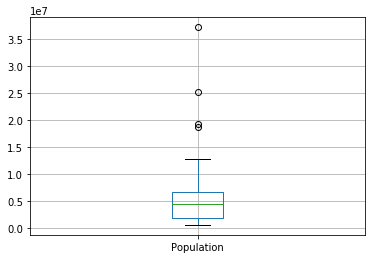

In [27]:
# Box Plot Pg. 21
%matplotlib inline
df.boxplot('Population');

In [28]:
# Frequency table Pg. 21
pop_freq = pd.cut(
    df.Population, 
    bins=10, 
    retbins=True, 
    include_lowest=True, 
    right=True)

df['Population.Range'] = pop_freq[0]
pop_group = df.groupby('Population.Range').State.apply(lambda x: (x.get_values(), x.count()))
pop_group.to_frame()

,State
Population.Range,
"[526935.67, 4232659]","([Alaska, Arkansas, Connecticut, Delaware, Haw..."
"(4232659, 7901692]","([Alabama, Arizona, Colorado, Indiana, Kentuck..."
"(7901692, 11570725]","([Georgia, Michigan, New Jersey, North Carolin..."
"(11570725, 15239758]","([Illinois, Pennsylvania], 2)"
"(15239758, 18908791]","([Florida], 1)"
"(18908791, 22577824]","([New York], 1)"
"(22577824, 26246857]","([Texas], 1)"
"(26246857, 29915890]","([], 0)"
"(29915890, 33584923]","([], 0)"


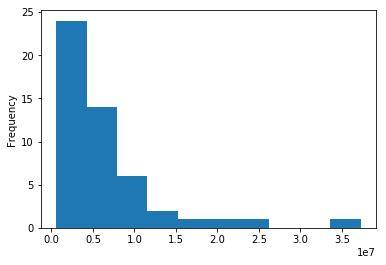

In [29]:
# Histogram Pg. 23
df.Population.plot(kind='hist');

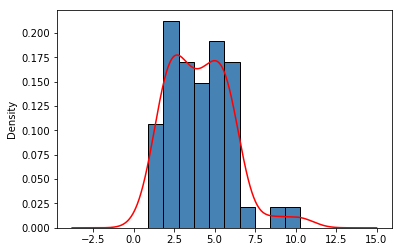

In [76]:
# Density Plot Pg. 24
# Working with multiple axes
# I spent a lot of time trying ot set the "density" and I needed the normed param...
# My matplotlib or pnada might be out of date bc normed is depricated and density should be used!!!
df['Murder.Rate'].plot(kind='hist', color='steelblue', edgecolor='black', normed=True);
df['Murder.Rate'].plot(kind='kde', color='red');